In this project, I will observe the data given and answer the following questions:

- Is there a benefit for an investor to choose one company over the other?
- Is there a city an investor should prioirtize due to income?
- Is there a city an investor should prioirtize due to usage?
- Which age groups should be targetted the most through advertisements
- Which gender should be targetted the most through advertisements
- Are the prices per km consistent? Which city's have the most expensive?

The aim will be to support XYZ firm to find who they should invest in and where

In [102]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

First we will observe the files

In [103]:
City = pd.read_csv("City.csv")
print(f"There are {len(City)} rows")
print(f"There are {len(City.columns)} columns")
print(f'The size is {os.path.getsize("City.csv") / 1024} kb')

There are 20 rows
There are 3 columns
The size is 0.7412109375 kb


In [104]:
Cab_Data = pd.read_csv("Cab_Data.csv")
print(f"There are {len(Cab_Data)} rows")
print(f"There are {len(Cab_Data.columns)} columns")
print(f'The size is {os.path.getsize("Cab_Data.csv") / 1024} kb')

There are 359392 rows
There are 7 columns
The size is 20662.705078125 kb


In [105]:
Customer_ID = pd.read_csv("Customer_ID.csv")
print(f"There are {len(Customer_ID)} rows")
print(f"There are {len(Customer_ID.columns)} columns")
print(f'The size is {os.path.getsize("Customer_ID.csv") / 1024} kb')

There are 49171 rows
There are 4 columns
The size is 1026.5771484375 kb


In [106]:
Transaction_ID = pd.read_csv("Transaction_ID.csv")
print(f"There are {len(Transaction_ID)} rows")
print(f"There are {len(Transaction_ID.columns)} columns")
print(f'The size is {os.path.getsize("Transaction_ID.csv") / 1024} kb')

There are 440098 rows
There are 3 columns
The size is 8787.298828125 kb


In [107]:
Transaction_ID

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [108]:
Customer_ID

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [109]:
City

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [110]:
Cab_Data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


We will drop duplicates

In [111]:
City = City.drop_duplicates().reset_index(drop=True)
Cab_Data = Cab_Data.drop_duplicates().reset_index(drop=True)
Customer_ID = Customer_ID.drop_duplicates().reset_index(drop=True)
Transaction_ID = Transaction_ID.drop_duplicates().reset_index(drop=True)

We will make joins to clean the tables

In [112]:
#Noticing we can join City and Cab_Data on City

In [113]:
combined = pd.merge(City, Cab_Data, on="City", how="inner")
combined

,City,Population,Users,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip
0,NEW YORK NY,"8,405,837","302,149",10000139,42377,Pink Cab,17.85,242.90,198.1350
1,NEW YORK NY,"8,405,837","302,149",10000140,42378,Pink Cab,25.30,407.21,255.5300
2,NEW YORK NY,"8,405,837","302,149",10000141,42375,Pink Cab,16.32,236.41,186.0480
3,NEW YORK NY,"8,405,837","302,149",10000142,42373,Pink Cab,12.43,194.61,144.1880
4,NEW YORK NY,"8,405,837","302,149",10000143,42378,Pink Cab,29.70,434.57,350.4600
...,...,...,...,...,...,...,...,...,...
359387,BOSTON MA,"248,968","80,021",10437872,43104,Yellow Cab,1.96,26.23,25.1664
359388,BOSTON MA,"248,968","80,021",10437873,43105,Yellow Cab,23.52,380.22,338.6880
359389,BOSTON MA,"248,968","80,021",10437874,43106,Yellow Cab,29.10,393.33,391.1040
359390,BOSTON MA,"248,968","80,021",10437875,43108,Yellow Cab,3.33,42.31,46.7532


We can answer a question here: Is there a city an investor should prioirtize due to usage?

In [114]:
#Count how many times individual cities appear
combined['City'].value_counts()

NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64

We found that the first five cities, New York, Chicago, Los Angeles, Washington, and Boston seem to have the most usage. Therefore, if investors need to choose a city, these would be great options. Furthermore, city's like Pheonix, Tucson, and Pittsburg should be avoided.

It should be noted that perhaps the data itself is faulty- there is a chance the data does not have all the cab data from cities like Tuscon, and was biased towards popular cities. More research must be done here.

In [115]:
#Noticing joins for Transaction_ID and Customer_ID
combined_2 = pd.merge(Transaction_ID, Customer_ID, on="Customer ID", how="inner")
combined_2

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,Male,28,10813
1,10351127,29290,Cash,Male,28,10813
2,10412921,29290,Card,Male,28,10813
3,10000012,27703,Card,Male,27,9237
4,10320494,27703,Card,Male,27,9237
...,...,...,...,...,...,...
440093,10439799,12490,Cash,Male,33,18713
440094,10439820,14971,Card,Male,30,15346
440095,10439838,41414,Card,Male,38,3960
440096,10439840,41677,Cash,Male,23,19454


In [116]:
#Finally combining both merged on Transaction ID, I prefer to have it all on one graph
combined_final = pd.merge(combined, combined_2, on="Transaction ID", how="inner")
combined_final

,City,Population,Users,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,NEW YORK NY,"8,405,837","302,149",10000139,42377,Pink Cab,17.85,242.90,198.1350,2416,Cash,Male,28,21399
1,NEW YORK NY,"8,405,837","302,149",10000140,42378,Pink Cab,25.30,407.21,255.5300,2060,Card,Male,18,8149
2,NEW YORK NY,"8,405,837","302,149",10000141,42375,Pink Cab,16.32,236.41,186.0480,1451,Card,Male,35,23989
3,NEW YORK NY,"8,405,837","302,149",10000142,42373,Pink Cab,12.43,194.61,144.1880,1609,Card,Male,30,23036
4,NEW YORK NY,"8,405,837","302,149",10000143,42378,Pink Cab,29.70,434.57,350.4600,2927,Cash,Male,33,14520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,BOSTON MA,"248,968","80,021",10437872,43104,Yellow Cab,1.96,26.23,25.1664,59926,Card,Female,59,4172
359388,BOSTON MA,"248,968","80,021",10437873,43105,Yellow Cab,23.52,380.22,338.6880,57905,Card,Male,60,31941
359389,BOSTON MA,"248,968","80,021",10437874,43106,Yellow Cab,29.10,393.33,391.1040,57906,Cash,Male,37,26410
359390,BOSTON MA,"248,968","80,021",10437875,43108,Yellow Cab,3.33,42.31,46.7532,59259,Cash,Male,51,15360


Some more data cleaning

In [117]:
#Noticing that for every section of city, there is users and population, this is uncessary.
#They will be removed to a seperate city dataframe if needed to go back to
city_dim = (
    combined_final
    .groupby('City', as_index=False)
    .agg(Population=('Population', 'first'),
         Users=('Users', 'first'))
)

city_dim

,City,Population,Users
0,ATLANTA GA,"814,885","24,701"
1,AUSTIN TX,"698,371","14,978"
2,BOSTON MA,"248,968","80,021"
3,CHICAGO IL,"1,955,130","164,468"
4,DALLAS TX,"942,908","22,157"
5,DENVER CO,"754,233","12,421"
6,LOS ANGELES CA,"1,595,037","144,132"
7,MIAMI FL,"1,339,155","17,675"
8,NASHVILLE TN,"327,225","9,270"
9,NEW YORK NY,"8,405,837","302,149"


In [118]:
#Dropping users and population
combined_final.drop(columns=['Users', 'Population'], inplace=True)
combined_final

,City,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,NEW YORK NY,10000139,42377,Pink Cab,17.85,242.90,198.1350,2416,Cash,Male,28,21399
1,NEW YORK NY,10000140,42378,Pink Cab,25.30,407.21,255.5300,2060,Card,Male,18,8149
2,NEW YORK NY,10000141,42375,Pink Cab,16.32,236.41,186.0480,1451,Card,Male,35,23989
3,NEW YORK NY,10000142,42373,Pink Cab,12.43,194.61,144.1880,1609,Card,Male,30,23036
4,NEW YORK NY,10000143,42378,Pink Cab,29.70,434.57,350.4600,2927,Cash,Male,33,14520
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,BOSTON MA,10437872,43104,Yellow Cab,1.96,26.23,25.1664,59926,Card,Female,59,4172
359388,BOSTON MA,10437873,43105,Yellow Cab,23.52,380.22,338.6880,57905,Card,Male,60,31941
359389,BOSTON MA,10437874,43106,Yellow Cab,29.10,393.33,391.1040,57906,Cash,Male,37,26410
359390,BOSTON MA,10437875,43108,Yellow Cab,3.33,42.31,46.7532,59259,Cash,Male,51,15360


Next we can answer the following: Are the prices per km consistent? Which city's have the most expensive?

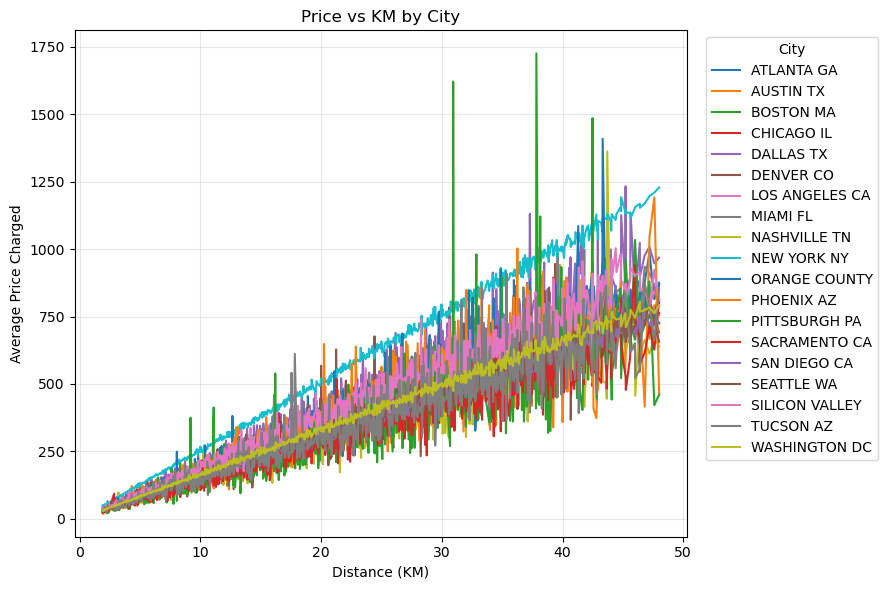

In [119]:
#Although very confused with difference of cost of trip and price charged, I will go with price charged
#Graph showcasing price charged vs km, different color lines by cities
plotdata = (
    combined_final.groupby(['City', 'KM Travelled'], as_index=False)['Price Charged'].mean().sort_values(['City', 'KM Travelled'])
)

plt.figure(figsize=(9,6))
for city, sub in plotdata.groupby('City'):
    plt.plot(sub['KM Travelled'], sub['Price Charged'], label=city)

plt.xlabel('Distance (KM)')
plt.ylabel('Average Price Charged')
plt.title('Price vs KM by City')
plt.legend(title='City', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

It seems Boston has many outliers. XYZ shuld avoid it due to the outliers and inconsistencies. Moreover, New York still charges more per KM, but it is consistent.

In [120]:
#Interestingly, its shown that each city is consistent with its prices per KM- some cities simply were more expensive 
#and charged more

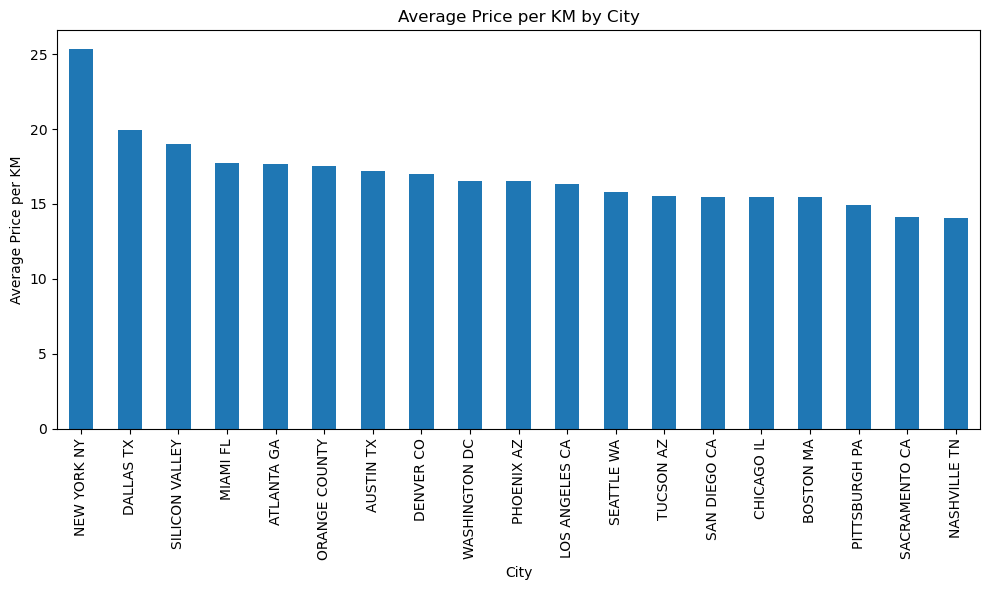

In [121]:
#Interested in knowing how the cities differ for cost per km
city_sums = combined_final.groupby('City', as_index=True)[['Price Charged','KM Travelled']].sum()
avg_price_per_km = (city_sums['Price Charged'] / city_sums['KM Travelled']).sort_values(ascending=False)
plt.figure(figsize=(10,6))
avg_price_per_km.plot(kind='bar')
plt.ylabel('Average Price per KM')
plt.xlabel('City')
plt.title('Average Price per KM by City')
plt.tight_layout()
plt.show()

Again, a better graph above showing New York charging the most, while the rest are seemingly the same

In [122]:
#Average price per km by city
avg_price_per_km

City
NEW YORK NY       25.326314
DALLAS TX         19.916270
SILICON VALLEY    19.018356
MIAMI FL          17.742867
ATLANTA GA        17.671817
ORANGE COUNTY     17.504572
AUSTIN TX         17.188801
DENVER CO         17.031976
WASHINGTON DC     16.548110
PHOENIX AZ        16.512413
LOS ANGELES CA    16.345221
SEATTLE WA        15.778072
TUCSON AZ         15.558252
SAN DIEGO CA      15.496902
CHICAGO IL        15.480417
BOSTON MA         15.453368
PITTSBURGH PA     14.897402
SACRAMENTO CA     14.140271
NASHVILLE TN      14.037494
dtype: float64

With that answered, XYZ should focus on New York, Los Angeles, Chicago, and Washington DC. Next we can focus on the cab companies themselves. Firstly, which company has more trasactions?

In [123]:
combined['Company'].value_counts()

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

What are the average rates by company by city?

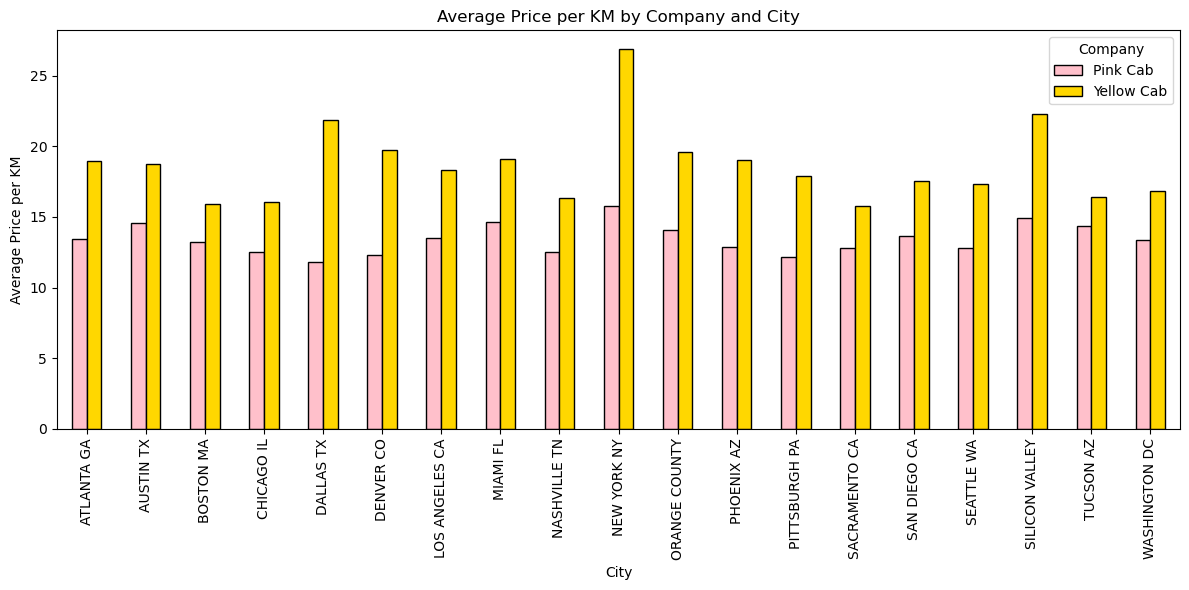

In [124]:
grouped = (combined_final.groupby(['City', 'Company'], as_index=False).agg({'Price Charged': 'sum', 'KM Travelled': 'sum'}))
grouped['avg_price_per_km'] = grouped['Price Charged'] / grouped['KM Travelled']
pivot = grouped.pivot(index='City', columns='Company', values='avg_price_per_km')
pivot.plot(kind='bar',
           figsize=(12,6),
           color=['pink','gold'],
           edgecolor='black')

plt.ylabel('Average Price per KM')
plt.xlabel('City')
plt.title('Average Price per KM by Company and City')
plt.legend(title='Company')
plt.tight_layout()
plt.show()

In [125]:
grouped.head()

,City,Company,Price Charged,KM Travelled,avg_price_per_km
0,ATLANTA GA,Pink Cab,532355.80,39715.17,13.404344
1,ATLANTA GA,Yellow Cab,2447885.92,128928.59,18.986370
2,AUSTIN TX,Pink Cab,598572.71,41038.42,14.585667
3,AUSTIN TX,Yellow Cab,1278569.79,68168.88,18.755916
4,BOSTON MA,Pink Cab,1558660.02,117933.51,13.216430


In [126]:
grouped.loc[grouped['Company']=='Yellow Cab', 'avg_price_per_km'].to_numpy()- grouped.loc[grouped['Company']=='Pink Cab', 'avg_price_per_km'].to_numpy()

array([ 5.58202607,  4.17024949,  2.71446115,  3.55486478, 10.04251938,
        7.45046311,  4.84386589,  4.50755235,  3.86020519, 11.102124  ,
        5.56211317,  6.14019492,  5.75002028,  2.96705642,  3.86328619,
        4.48139684,  7.38213893,  2.10850407,  3.49804649])

Great- with this work we can see that Yellow cab has more sales and charges more by km than Pink cab. XYZ should definitley invest in Yellow cab more. The only case where it fails is if the public decide to user Pink cab- however it seems that Yellow cab simply is either more famous or has better quality

Now finally I want to look at gender and age groups

In [127]:
combined_final['Gender'].value_counts()

Male      205912
Female    153480
Name: Gender, dtype: int64

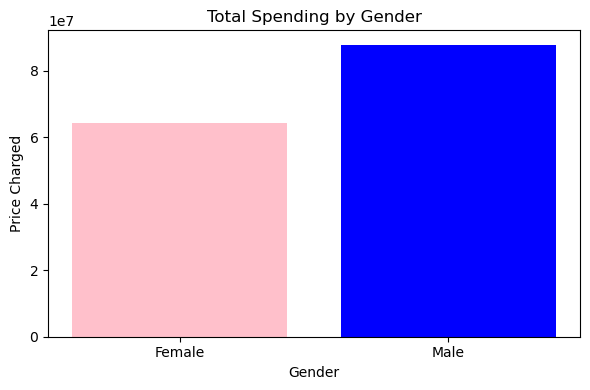

In [128]:
gender_spending = combined_final.groupby('Gender')['Price Charged'].sum().reset_index()
plt.figure(figsize=(6,4))
plt.bar(gender_spending['Gender'], gender_spending['Price Charged'],color=['pink','blue'])
plt.title('Total Spending by Gender')
plt.xlabel('Gender')
plt.ylabel('Price Charged')
plt.tight_layout()
plt.show()

It should be noted that there are more males, so this graph is expected. It does not seem like XYZ should focus on just one gender

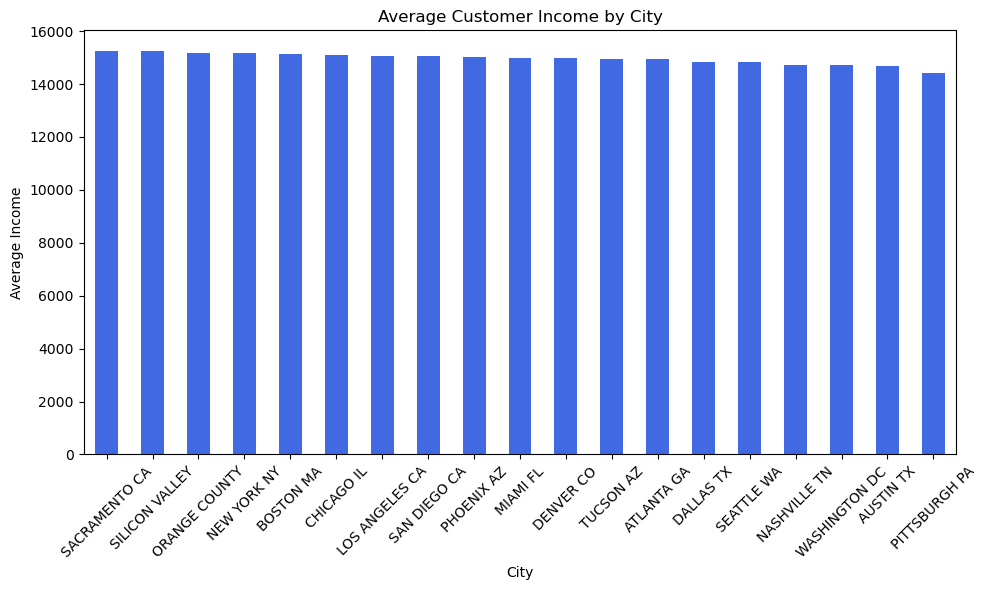

In [129]:
avg_income_by_city = combined_final.groupby('City')['Income (USD/Month)'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
avg_income_by_city.plot(kind='bar', color='royalblue')

plt.title('Average Customer Income by City')
plt.xlabel('City')
plt.ylabel('Average Income')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

It seems there may be outliers since the income seems way too high. Will go with a line graph instead

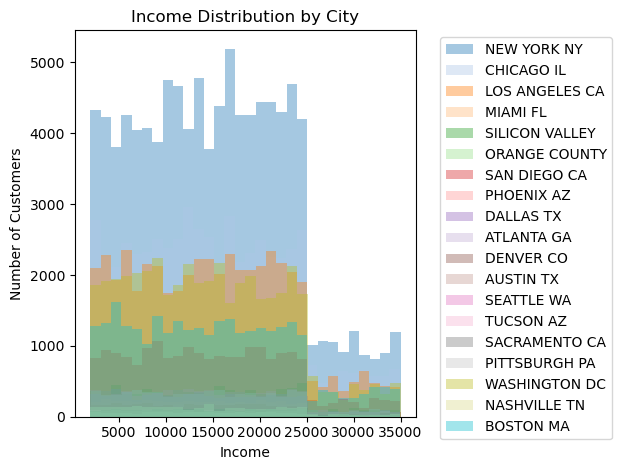

In [130]:
colors = plt.cm.tab20.colors   # plenty of distinct colors

for i, city in enumerate(combined_final['City'].unique()):
    city_data = combined_final.loc[combined_final['City'] == city, 'Income (USD/Month)']
    plt.hist(city_data,
             bins=30,
             alpha=0.4,                 # transparency so overlaps show
             color=colors[i % len(colors)],
             label=city)

plt.title('Income Distribution by City')
plt.xlabel('Income')
plt.ylabel('Number of Customers')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

As expected, many outliers, so average income does not matter. However, highest regular income seems to be New York and Los Angeles and San Diego

To conclude- XYZ should invest in Yellow Cab company over Pink Cab Company, and focus on New York city the most if needed, with Los Angeles, San Diego, Chicago, and Washington DC as other options. If XYZ wants to promote the company it invests in, it should do so in those cities